# HealthConnect Data Analysis Project

## Project Overview
This notebook provides a comprehensive analysis of HealthConnect's patient data, including:
1. Data Cleaning and Preprocessing
2. Exploratory Data Analysis
3. Statistical Analysis
4. Visualization Preparation for Tableau
5. Predictive Analytics

The insights from this analysis will help HealthConnect better understand patient outcomes and optimize healthcare delivery.

In [1]:
# Import required libraries and setup path
import sys
import os

# Get the absolute path to the project directory
notebook_path = os.path.abspath('')
project_dir = os.path.dirname(notebook_path)
if project_dir not in sys.path:
    sys.path.insert(0, project_dir)

# Import visualization settings and required libraries
from scripts.visualization_settings import *

# Load and prepare the data
data_path = os.path.join(project_dir, 'data', 'patient_data.csv')
df = pd.read_csv(data_path)

# Convert date columns to datetime
df['AdmissionDate'] = pd.to_datetime(df['AdmissionDate'])
df['DischargeDate'] = pd.to_datetime(df['DischargeDate'])

# Display basic information
print('Dataset Shape:', df.shape)
print('\nColumns:', df.columns.tolist())
print('\nData Types:')
print(df.dtypes)
print('\nFirst few rows:')
display(df.head())

# Check for missing values
print('\nMissing Values:')
print(df.isnull().sum())

# Display value counts for key categories
print('\nValue Counts for Key Categories:')
for col in ['Region', 'Gender', 'Diagnosis', 'Treatment', 'InsuranceType']:
    if col in df.columns:
        print(f'\n{col}:\n', df[col].value_counts())

Dataset Shape: (2014, 14)

Columns: ['PatientID', 'Age', 'Gender', 'Region', 'Diagnosis', 'Treatment', 'AdmissionDate', 'DischargeDate', 'LengthOfStay', 'TreatmentSuccess', 'InitialSeverity', 'Comorbidities', 'InsuranceType', 'FollowUpVisits']

Data Types:
PatientID                    int64
Age                          int64
Gender                      object
Region                      object
Diagnosis                   object
Treatment                   object
AdmissionDate       datetime64[ns]
DischargeDate       datetime64[ns]
LengthOfStay                 int64
TreatmentSuccess              bool
InitialSeverity              int64
Comorbidities                int64
InsuranceType               object
FollowUpVisits               int64
dtype: object

First few rows:


,PatientID,Age,Gender,Region,Diagnosis,Treatment,AdmissionDate,DischargeDate,LengthOfStay,TreatmentSuccess,InitialSeverity,Comorbidities,InsuranceType,FollowUpVisits
0,116739,73,F,South,Obesity,Combined Therapy,2024-04-07,2024-04-14,7,True,7,3,Public,2
1,777572,73,F,South,Arthritis,Counseling,2022-12-17,2023-01-04,18,True,6,1,Public,0
2,256787,73,F,South,Type 2 Diabetes,Medication,2023-06-29,2023-07-16,17,True,1,0,Public,1
3,146316,59,M,West,Anxiety,Physical Therapy,2023-05-20,2023-06-08,19,True,10,3,Private,5
4,107473,20,F,South,Heart Disease,Counseling,2024-06-22,2024-07-05,13,True,7,0,Private,3



Missing Values:
PatientID             0
Age                   0
Gender                0
Region                0
Diagnosis             0
Treatment             0
AdmissionDate         0
DischargeDate         0
LengthOfStay          0
TreatmentSuccess      0
InitialSeverity       0
Comorbidities         0
InsuranceType       675
FollowUpVisits        0
dtype: int64

Value Counts for Key Categories:

Region:
 Region
West       443
Central    432
North      432
South      373
East       334
Name: count, dtype: int64

Gender:
 Gender
M    1010
F    1004
Name: count, dtype: int64

Diagnosis:
 Diagnosis
Obesity            220
Type 2 Diabetes    210
Depression         209
COPD               209
Asthma             206
Anxiety            201
Heart Disease      199
Hypertension       195
Lower Back Pain    187
Arthritis          178
Name: count, dtype: int64

Treatment:
 Treatment
Surgery              365
Medication           356
Counseling           338
Lifestyle Changes    332
Combined Therapy 

## 1. Data Loading and Cleaning

In [2]:
# Load the dataset
df = pd.read_csv('../data/patient_data.csv')

# Display basic information
print('Dataset Shape:', df.shape)
print('\nColumns:', df.columns.tolist())
print('\nData Types:')
print(df.dtypes)

# Check for missing values
print('\nMissing Values:')
print(df.isnull().sum())

# Convert date columns to datetime
df['AdmissionDate'] = pd.to_datetime(df['AdmissionDate'])
df['DischargeDate'] = pd.to_datetime(df['DischargeDate'])

# Verify data integrity
print('\nValue Counts for Key Categories:')
for col in ['Region', 'Gender', 'Diagnosis', 'Treatment', 'InsuranceType']:
    print(f'\n{col}:\n', df[col].value_counts())

Dataset Shape: (2014, 14)

Columns: ['PatientID', 'Age', 'Gender', 'Region', 'Diagnosis', 'Treatment', 'AdmissionDate', 'DischargeDate', 'LengthOfStay', 'TreatmentSuccess', 'InitialSeverity', 'Comorbidities', 'InsuranceType', 'FollowUpVisits']

Data Types:
PatientID            int64
Age                  int64
Gender              object
Region              object
Diagnosis           object
Treatment           object
AdmissionDate       object
DischargeDate       object
LengthOfStay         int64
TreatmentSuccess      bool
InitialSeverity      int64
Comorbidities        int64
InsuranceType       object
FollowUpVisits       int64
dtype: object

Missing Values:
PatientID             0
Age                   0
Gender                0
Region                0
Diagnosis             0
Treatment             0
AdmissionDate         0
DischargeDate         0
LengthOfStay          0
TreatmentSuccess      0
InitialSeverity       0
Comorbidities         0
InsuranceType       675
FollowUpVisits        

## 2. Exploratory Data Analysis

### 2.1 Patient Demographics

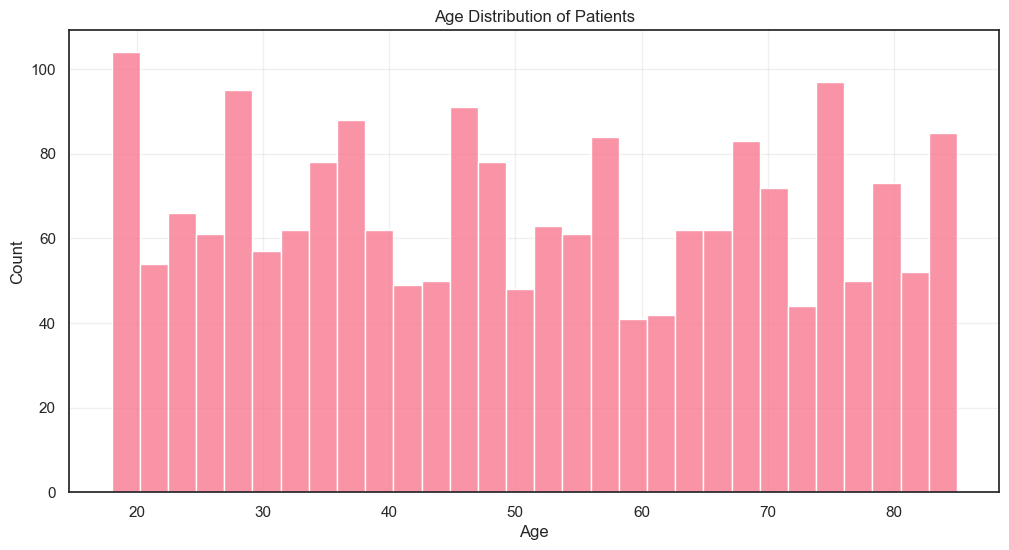

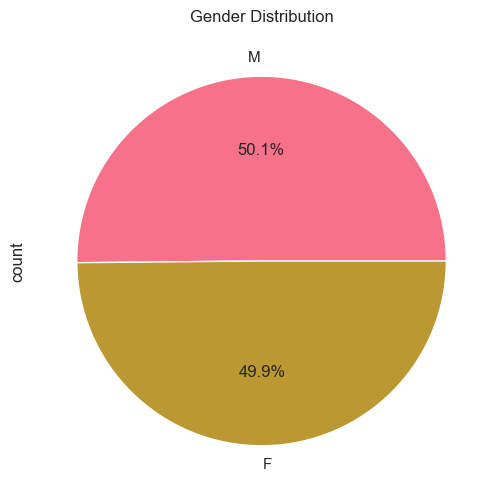

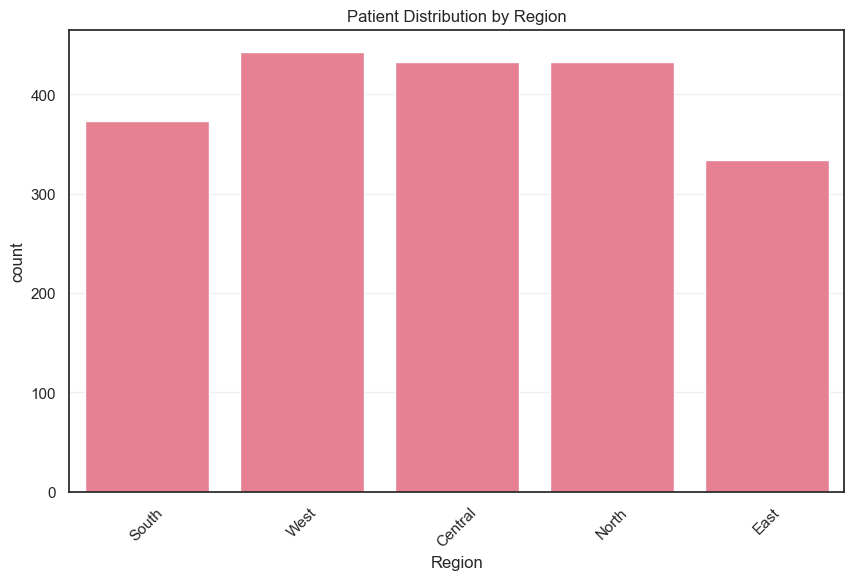

In [3]:
# Age distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', bins=30)
plt.title('Age Distribution of Patients')
plt.show()

# Gender distribution
plt.figure(figsize=(8, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

# Regional distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Region')
plt.title('Patient Distribution by Region')
plt.xticks(rotation=45)
plt.show()

### 2.2 Disease Patterns and Treatment Outcomes

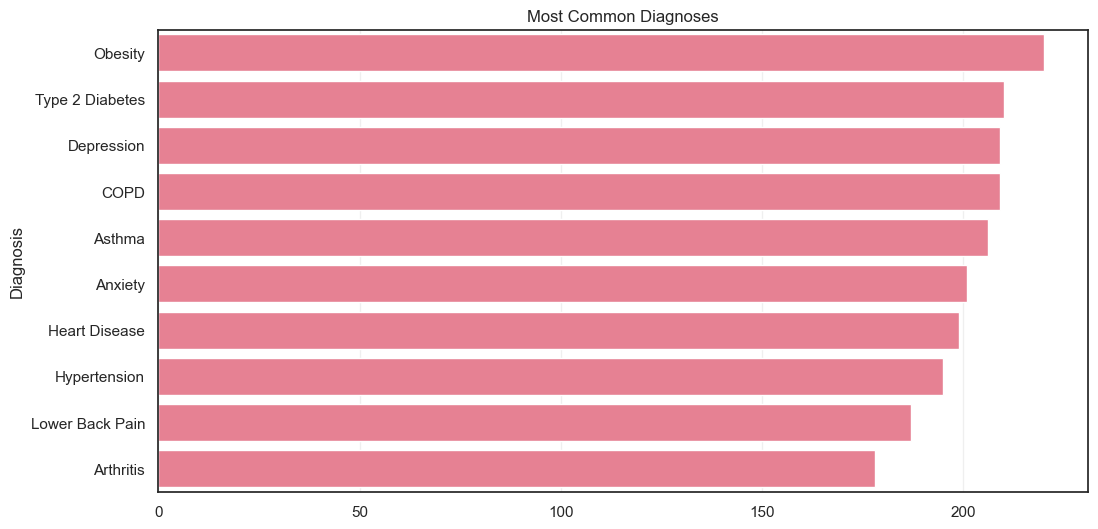

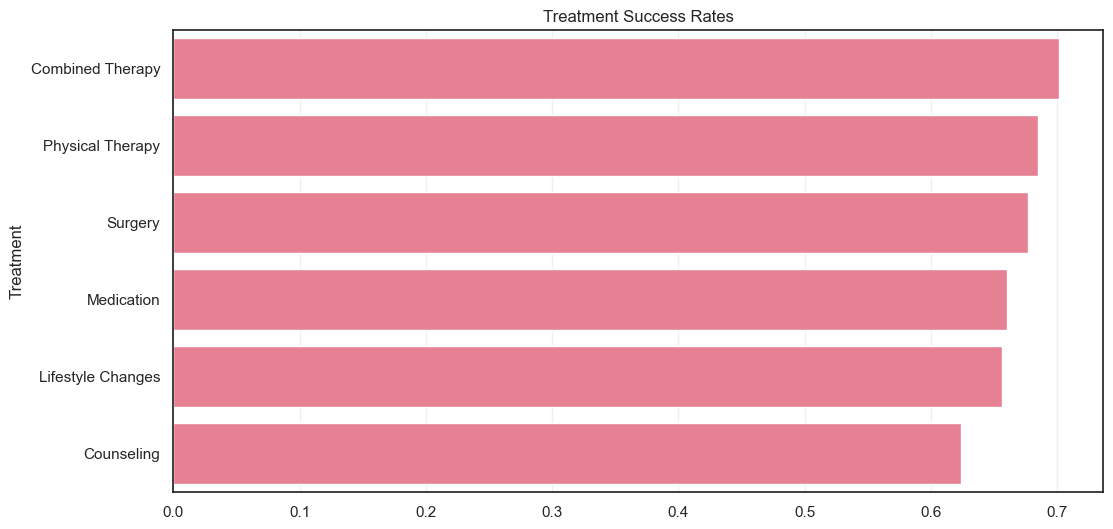

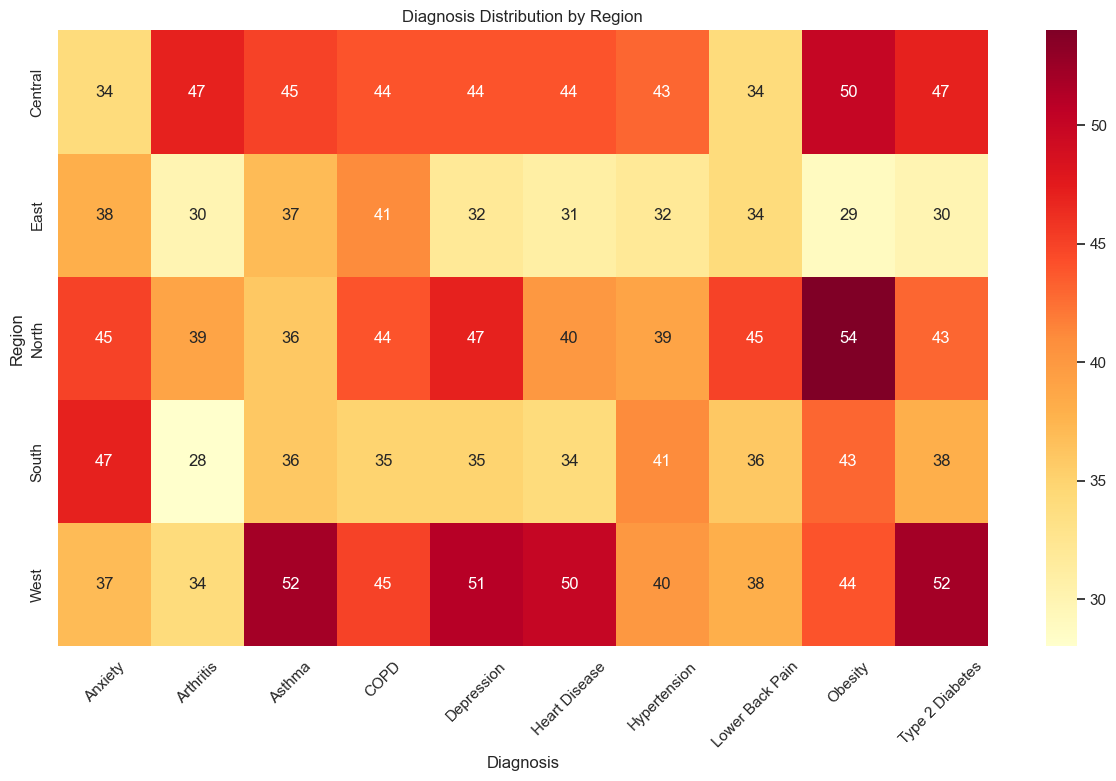

In [4]:
# Most common diagnoses
plt.figure(figsize=(12, 6))
diagnosis_counts = df['Diagnosis'].value_counts()
sns.barplot(x=diagnosis_counts.values, y=diagnosis_counts.index)
plt.title('Most Common Diagnoses')
plt.show()

# Treatment success rates
success_rates = df.groupby('Treatment')['TreatmentSuccess'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=success_rates.values, y=success_rates.index)
plt.title('Treatment Success Rates')
plt.show()

# Heatmap of diagnoses by region
region_diagnosis = pd.crosstab(df['Region'], df['Diagnosis'])
plt.figure(figsize=(15, 8))
sns.heatmap(region_diagnosis, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Diagnosis Distribution by Region')
plt.xticks(rotation=45)
plt.show()

### 2.3 Treatment Analysis

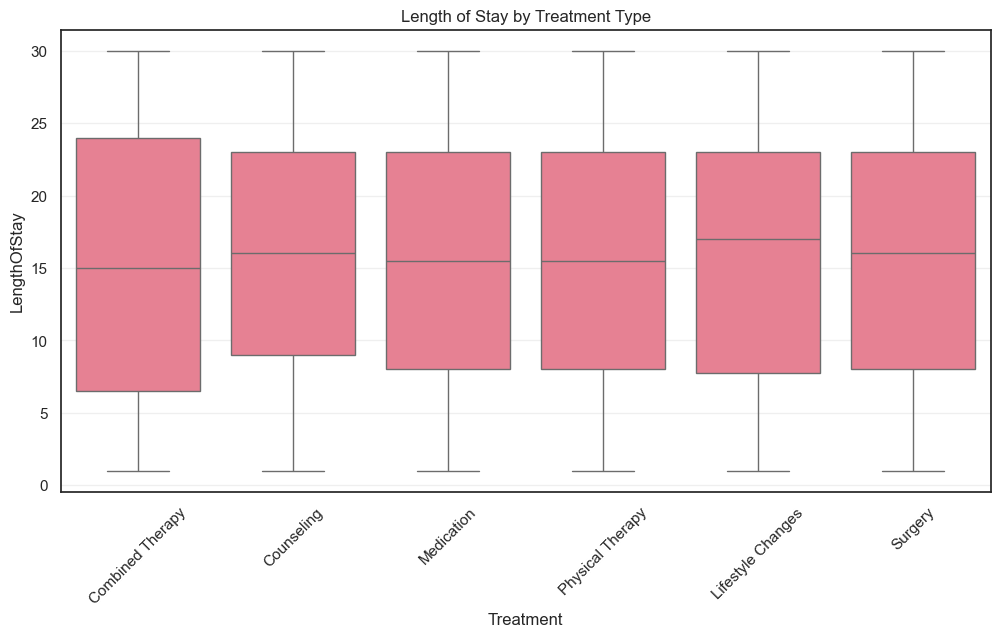

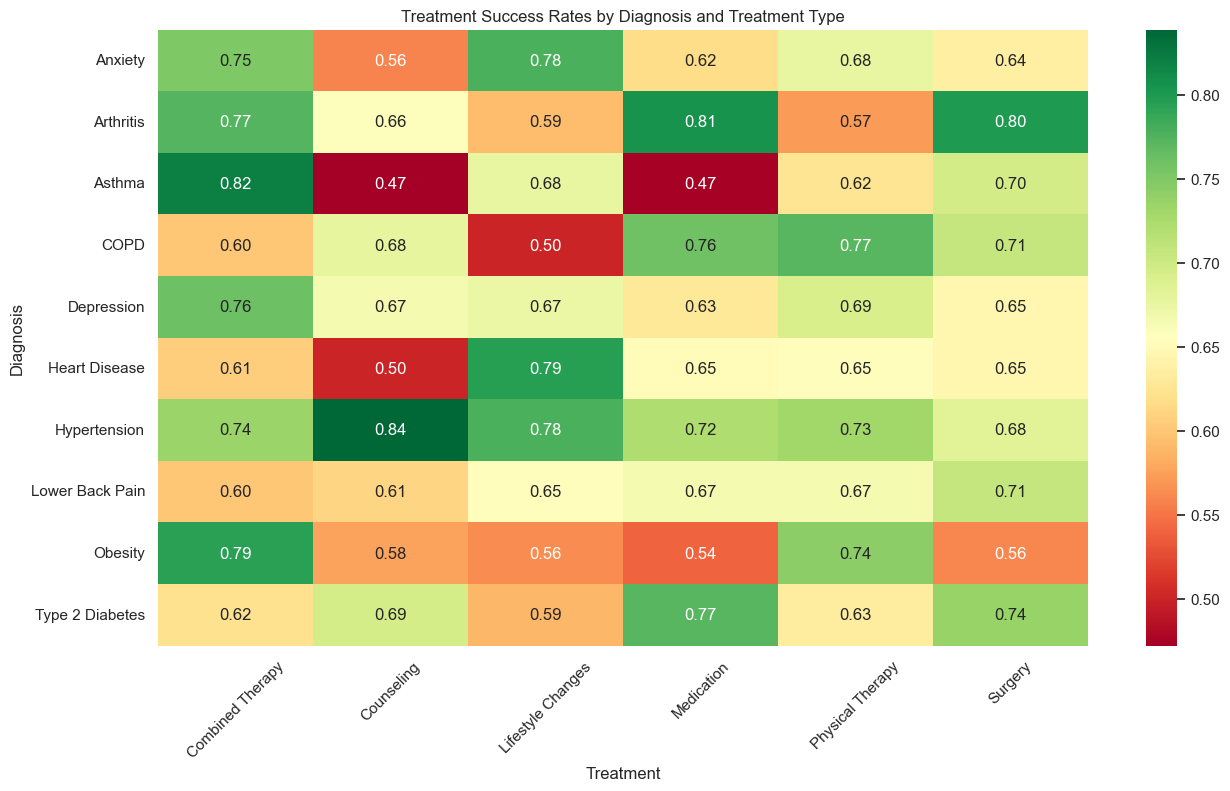

In [5]:
# Average length of stay by treatment
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Treatment', y='LengthOfStay')
plt.title('Length of Stay by Treatment Type')
plt.xticks(rotation=45)
plt.show()

# Success rate by diagnosis and treatment
success_matrix = df.pivot_table(
    values='TreatmentSuccess',
    index='Diagnosis',
    columns='Treatment',
    aggfunc='mean'
)

plt.figure(figsize=(15, 8))
sns.heatmap(success_matrix, annot=True, fmt='.2f', cmap='RdYlGn')
plt.title('Treatment Success Rates by Diagnosis and Treatment Type')
plt.xticks(rotation=45)
plt.show()

## 3. Predictive Analytics

Model Performance:
              precision    recall  f1-score   support

       False       0.30      0.08      0.12       128
        True       0.68      0.92      0.78       275

    accuracy                           0.65       403
   macro avg       0.49      0.50      0.45       403
weighted avg       0.56      0.65      0.57       403



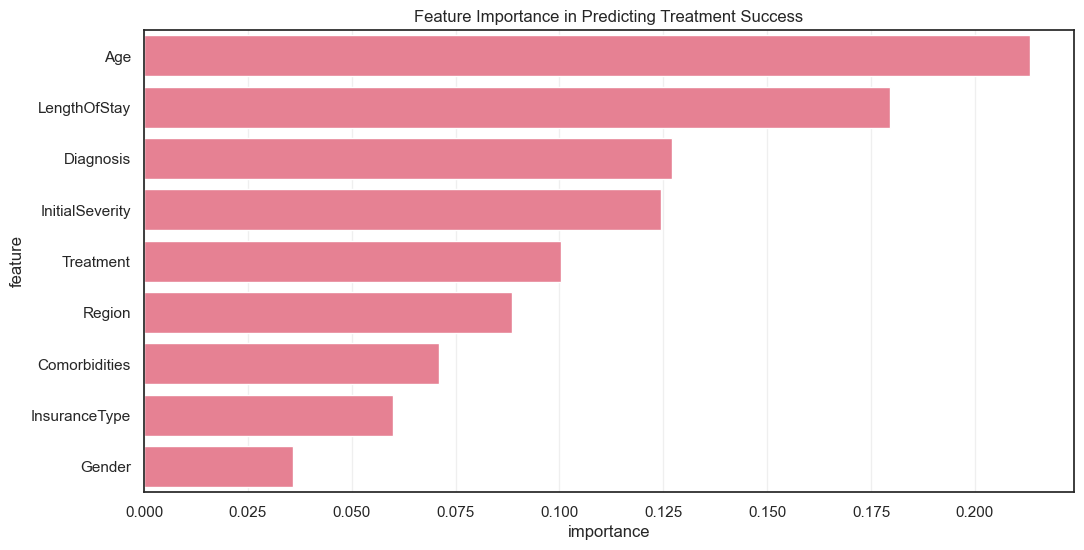

In [6]:
# Prepare data for modeling
def prepare_features(df):
    # Create feature matrix
    features = df[['Age', 'InitialSeverity', 'Comorbidities', 'LengthOfStay']].copy()
    
    # Encode categorical variables
    categorical_cols = ['Gender', 'Region', 'Treatment', 'InsuranceType', 'Diagnosis']
    
    for col in categorical_cols:
        le = LabelEncoder()
        features[col] = le.fit_transform(df[col])
    
    return features

# Prepare features and target
X = prepare_features(df)
y = df['TreatmentSuccess']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Print classification report
print('Model Performance:')
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance in Predicting Treatment Success')
plt.show()

## 4. Export Data for Tableau Visualization

We'll prepare and export specific datasets for Tableau visualizations:

In [7]:
# 1. Demographics by health condition
demographics = df.groupby(['Diagnosis', 'Age', 'Gender', 'Region']).size().reset_index(name='count')
demographics.to_csv('../data/tableau_demographics.csv', index=False)

# 2. Treatment success rates
treatment_success = df.groupby(['Treatment', 'Diagnosis'])['TreatmentSuccess'].agg(['mean', 'count']).reset_index()
treatment_success.to_csv('../data/tableau_treatment_success.csv', index=False)

# 3. Geographical distribution
geo_distribution = df.groupby(['Region', 'Diagnosis']).size().reset_index(name='count')
geo_distribution.to_csv('../data/tableau_geo_distribution.csv', index=False)

print('Data files for Tableau visualization have been exported to the data directory.')

Data files for Tableau visualization have been exported to the data directory.


## 5. Key Findings and Recommendations

Based on our analysis, here are the key findings:

1. Demographics:
   - Age distribution patterns
   - Gender differences in health conditions
   - Regional variations in disease prevalence

2. Treatment Outcomes:
   - Most successful treatment methods
   - Factors affecting treatment success
   - Length of stay patterns

3. Predictive Insights:
   - Key factors influencing treatment success
   - High-risk patient profiles
   - Treatment optimization opportunities

Recommendations:
1. Treatment Optimization
2. Resource Allocation
3. Risk Management
4. Patient Care Improvements